# Comparing self reported answers in Free Exploration groups

## Factors per task

[Free Exloration with Training: Informed](#A1)

[Free Exloration with Training: Uninformed](#A2)

[Free Exloration with Training: All subjects](#A3)

[Free Exploration Only](#A4)

## Comparison between factors and possible correlations

[Relation with respect to reported interest](#A5)

[Relation between accuracy and selection](#A6)

[Relation with respect to reported complexity](#A7)

[Relation with respect to reported progress](#A8)

[Relation with respect to reported time spent on task](#A9)

## Expected future learning

[Expected future learning per task](#A10)

[Relation between first selection, predicted future learning and proportion of people](#A11)
    
## Setup and imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
execute_notebook("file-preprocessing.ipynb")

[b'free']


In [3]:
tasks = 4
catLab = ['1D', 'I1D', '2D', 'R']

#users1 = usersF | users2=usersFT
usersF = np.shape(np.unique(csvIntF[:,0]))[0]
# For free exploration with Training
usersFT = np.shape(np.unique(csvIntFT[:,0]))[0]
usersFTI = np.shape(np.unique(informed[:,0]))[0]
usersFTU = usersFT-usersFTI

In [4]:
execute_notebook("file-preprocessing-reported-answers.ipynb")

Free Exploration - general metrics loaded
Free Exploration with Training - general metrics loaded
Strategic Learning - general metrics loaded


In [5]:
# Split by users that received information about the existence of a random task and those that didn't
informedFT = freeT[freeT[:,1]==0]
uninformedFT = freeT[freeT[:,1]==1]
# Remove column 
freeT = np.delete(freeT, 1, axis=1)
informedFT = np.delete(informedFT, 1, axis=1)
uninformedFT = np.delete(uninformedFT, 1, axis=1)
free = np.delete(free, 1, axis=1)

## Define plotting function

In [10]:
import itertools
import matplotlib.cm as cm

learnLab = ['gradual', 'insight', 'none', 'unsure']
ruleLab = ['no', 'unsure', 'yes']

def plotAgainstTask(arr, titles, offset, experimentNumber):
    
    # create an array of colors based on arr[:,0] so r,r,r,r,b,b,b,b,...
    if experimentNumber < 3:
        co = ["r", "b", "g", "k", "y"]
    else:
        co = cm.viridis(np.linspace(0, 1, usersFT))
    colors = [co[uid] for uid in arr[:,0].astype(int)]
    for i in range(len(titles)):
        fig, ax = plt.subplots(figsize=(5, 5))
        # Control tick frequency
        plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
        # Rename ticks
        ax.set_xticklabels(catLab)
        
        # Set y axis range and labels
        if titles[i] == 'Rule' and experimentNumber == 1:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(ruleLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        elif titles[i] == 'Type of Learning' and experimentNumber != 3:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(learnLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        else:
            ax.set_ylim([-0.5,10.5])
        
        plt.scatter(arr[:,1], arr[:,offset+i], c=colors, s=80, alpha=0.5)
        #Get means and std
        means = [np.mean(arr[arr[:,1] == k,offset+i]) for k in range(tasks)]
        std = [np.std(arr[arr[:,1] == k,offset+i]) for k in range(tasks)]
        plt.plot(means, 'k--', alpha=0.5)
        plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
        plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)
        plt.ylabel(titles[i])
        plt.xlabel('Tasks')
        plt.show()


<a id='A1'></a>
## Free Exloration with Training: Informed

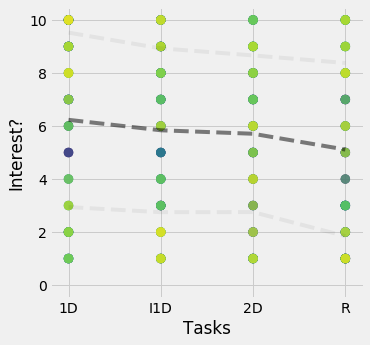

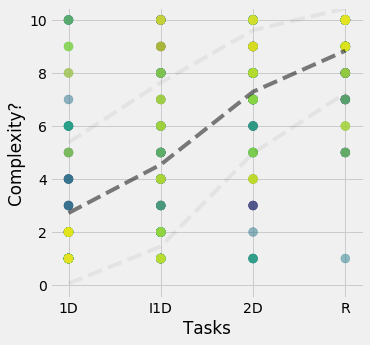

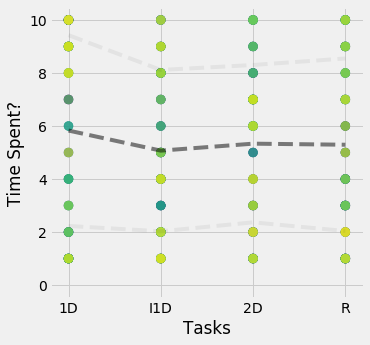

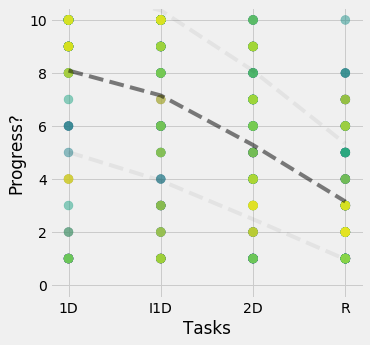

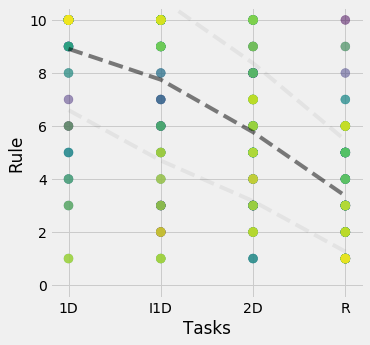

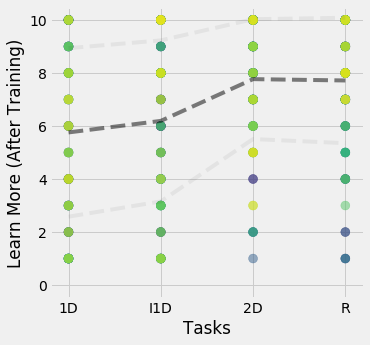

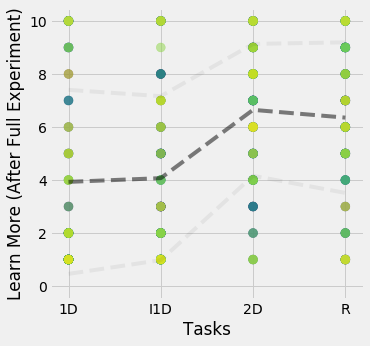

In [11]:
ytitlesFT = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Training)', 'Learn More (After Full Experiment)']
plotAgainstTask(informedFT, ytitlesFT, 6, 3)

<a id='A2'></a>
## Free Exloration with Training: Uninformed

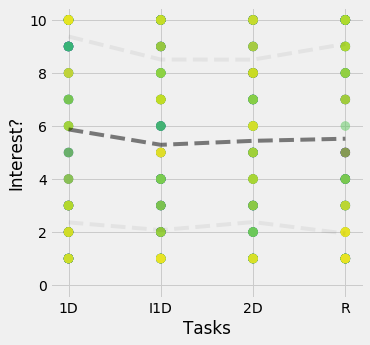

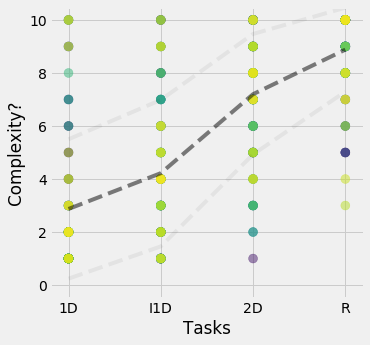

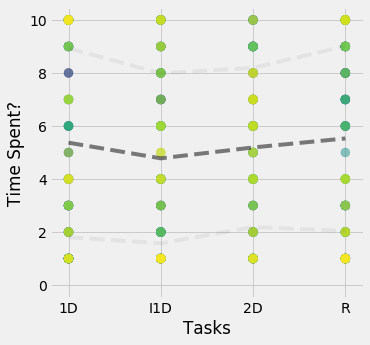

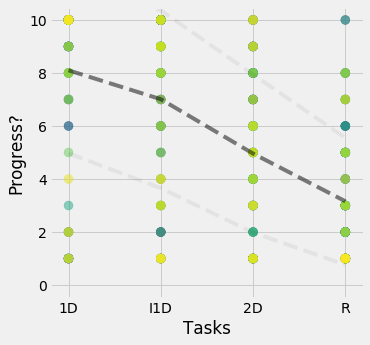

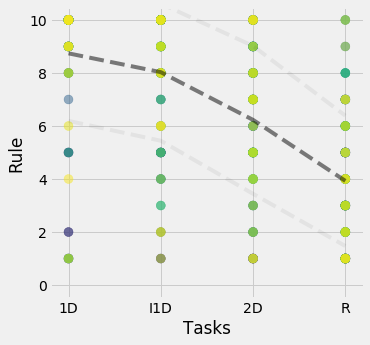

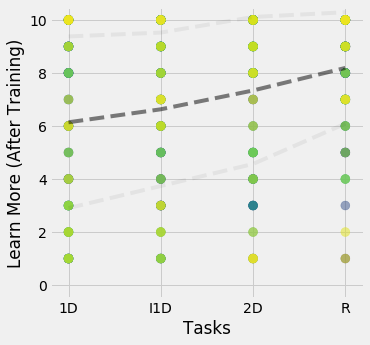

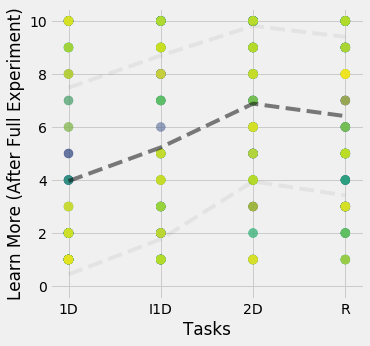

In [12]:
plotAgainstTask(uninformedFT, ytitlesFT, 6, 3)

<a id='A3'></a>
## Free Exloration with Training: All subjects

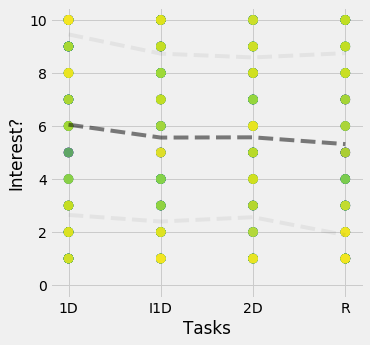

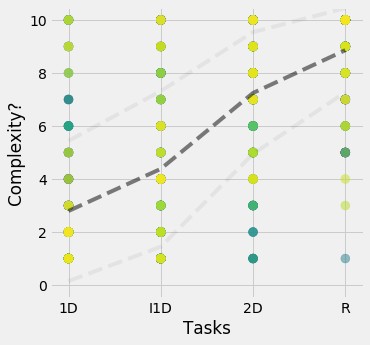

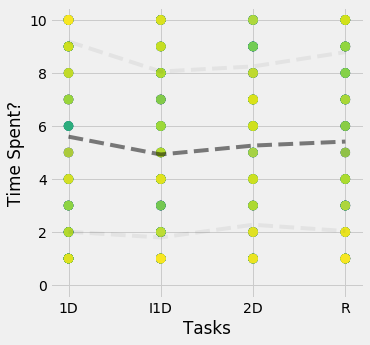

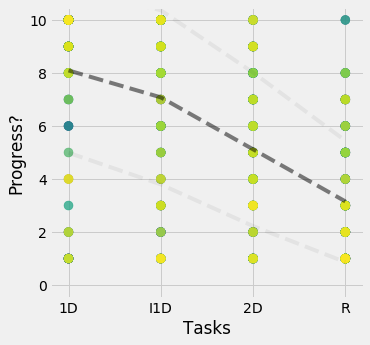

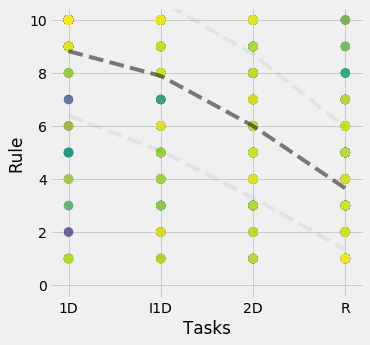

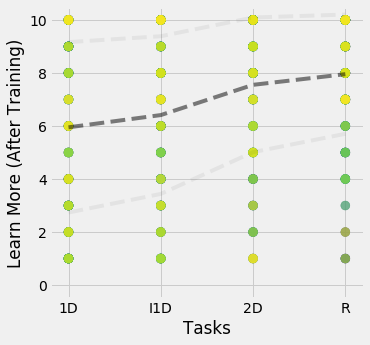

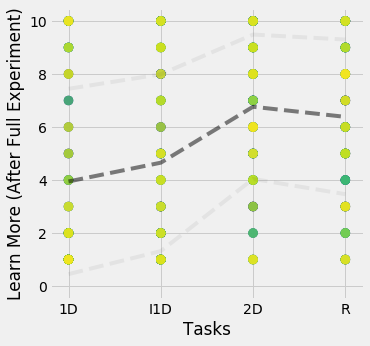

In [14]:

plotAgainstTask(freeT, ytitlesFT, 6, 3)

<a id='A4'></a>
## Free Exploration Only

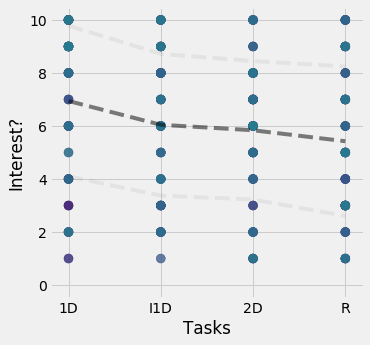

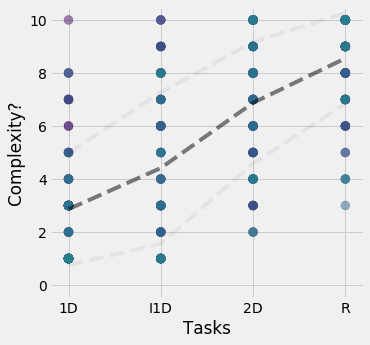

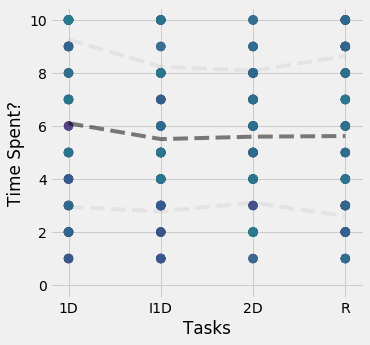

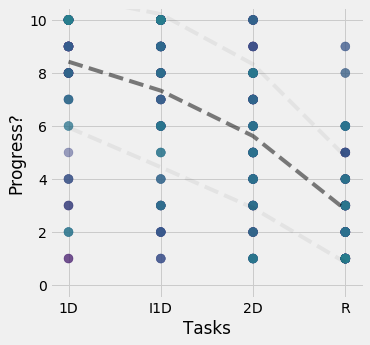

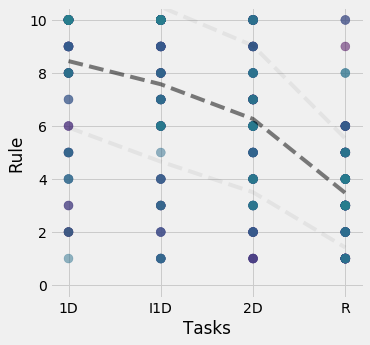

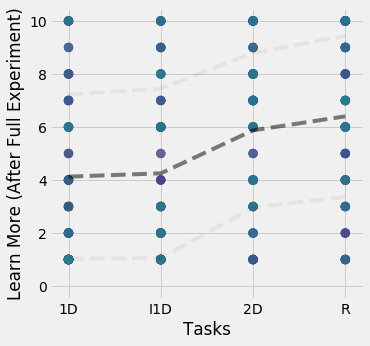

In [15]:
ytitlesF = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Full Experiment)']
plotAgainstTask(free, ytitlesF, 6, 3)

In [16]:
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)
def plotCombined(array1, array2, axisx, axisy, phasePilot2='exploration'):
    arr1 = array1.copy()
    arr2 = array2.copy()
    #axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, intst, cplx, tim, progr, rule, learn]
    dict = {'tkCplx': [1,'Task'], 
            'tkNSel': [2,'Times Selected'], 
            'tkPSel': [3,'Selected (Proportion)'],
            'tkNCorr': [4,'Times Correct'],
            'tkPCorr': [5,'Correct (Proportion)'],
            'interest': [6,'Interest'],
            'complex': [7,'Complexity'],
            'time': [8,'Time invested'],
            'progress': [9,'Progress'],
            'rule': [10,'Rule'],
            'learnAfterTrai': [11,'Type of Learning'],
            'learnAfterExp': [12,'Type of Learning']
           }
    # for fpilot learnAfterExp - 11 and learnAfterTrai doesn't exist
    
    xaxis, yaxis = dict[axisx][0], dict[axisy][0]
    
    # Depending on what is plotted swithc the column to where the free exploration data is for easy plotting
    if phasePilot2 == 'training':
        arr2[:,[4, 5]] = arr2[:,[13, 14]]
    
    fig, ax = plt.subplots(figsize=(5, 5))

    plt.scatter(arr1[:,xaxis], arr1[:,yaxis], c='r', s=80, alpha=0.5)
    plt.scatter(arr2[:,xaxis], arr2[:,yaxis], c='b', s=80, alpha=0.5)
    
    # Fit a polynomial
    if xaxis == 'learnAfterExp':
        m, b = np.polyfit(arr1[:,xaxis-1], arr1[:,yaxis], 1)
    elif yaxis == 'learnAfterExp':
        m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis-1], 1)
    else:
        m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'r-', label='Free Exp')
    m, b = np.polyfit(arr2[:,xaxis], arr2[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'b-', label=''.join(['Free Exp with Train']))
    
    plt.xlabel(dict[axisx][1])
    plt.ylabel(dict[axisy][1])
    
    plt.legend()
    plt.show()

<a id='A5'></a>
## Relation with respect to reported interest

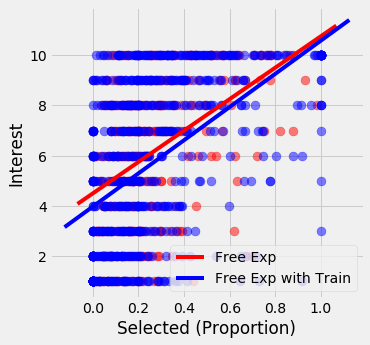

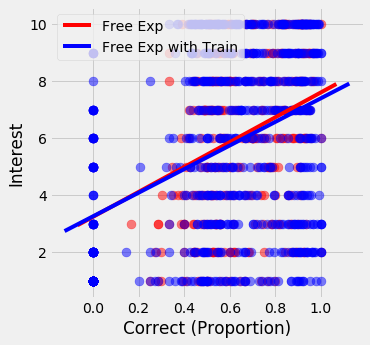

In [17]:
#%chosen and rep interest
plotCombined(free,freeT,'tkPSel','interest','exploration')
plotCombined(free,freeT,'tkPCorr','interest','exploration')

<a id='A6'></a>
## Relation between accuracy and selection

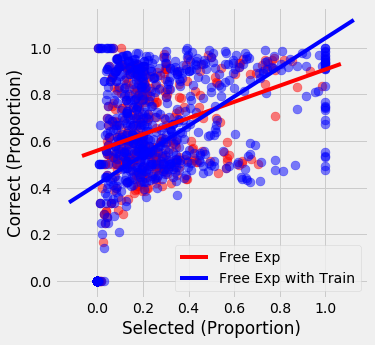

In [19]:
# %correct and %chosen
plotCombined(free,freeT,'tkPSel','tkPCorr','exploration')

<a id='A7'></a>
## Relation with respect to reported complexity

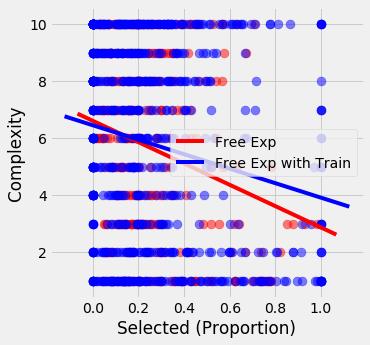

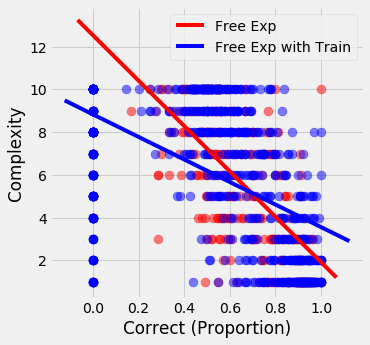

In [20]:
plotCombined(free,freeT,'tkPSel','complex','exploration')
plotCombined(free,freeT,'tkPCorr','complex','exploration')

<a id='A8'></a>
## Relation with respect to reported progress

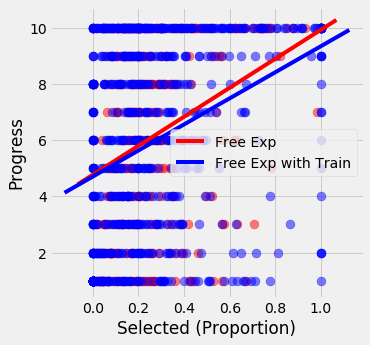

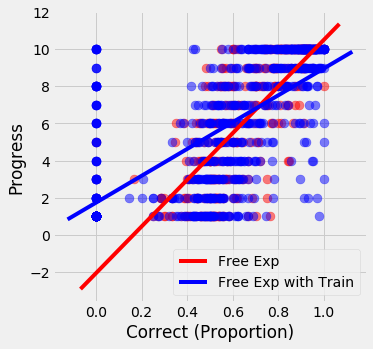

In [21]:
plotCombined(free,freeT,'tkPSel','progress','exploration')
plotCombined(free,freeT,'tkPCorr','progress','exploration')

<a id='A9'></a>
## Relation with respect to reported time spent on task

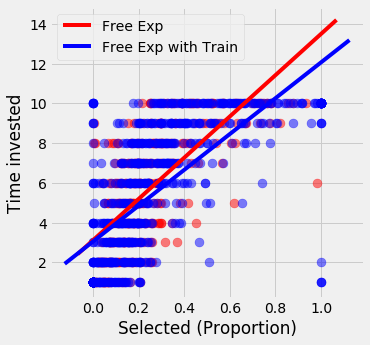

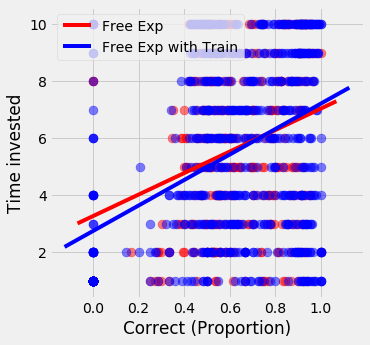

In [22]:
plotCombined(free,freeT,'tkPSel','time','exploration')
plotCombined(free,freeT,'tkPCorr','time','exploration')

<a id='A10'></a>
## Expected future learning per task

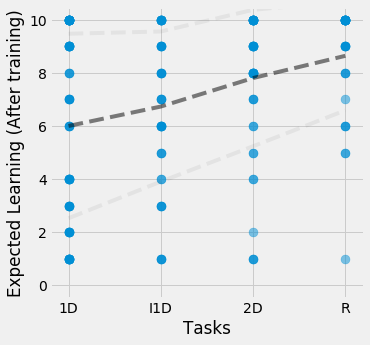

In [26]:
# How people are selecting after training
def checkFirstOption(arr, usersArr, checkIncomplete=False):
    firstSelec = []
    incomplete = []
    for u in range(usersArr):
        # If it's necessary to check those that didn't explore all tasks
        if checkIncomplete:
            questions = arr[u]
            # Count number of times a task was selected
            task, ctask = np.unique(questions[:,1], return_counts=True)

            # Check if it explored all tasks
            if len(task) < 4:
                incomplete.append(u)
            else:
                firstSelec.append(arr[u][0,1])
        else:
            firstSelec.append(arr[u][0,1])
            
    if checkIncomplete:
        return np.asarray(firstSelec), incomplete
    else:
        return np.asarray(firstSelec)
        
def corrFirstSelection(arr, firstSel):
    grades = []
    for u in range(len(np.unique(arr[:,0]))): #get users
        temp = arr[arr[:,0] == u,:]
        # Slice by category that was first selected
        grade = temp[temp[:,1] == firstSel[u], 11] # 11 is the column for expected learning after training (in this case)
        grades.append(grade)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    # Control tick frequency
    plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
    # Rename ticks
    ax.set_xticklabels(catLab)
    ax.set_ylim([-0.5,10.5])
    plt.scatter(firstSel, grades, s=80, alpha=0.5)

    #Get means and std
    means = [np.mean(np.asarray(grades)[firstSel == k]) for k in range(tasks)]
    std = [np.std(np.asarray(grades)[firstSel == k]) for k in range(tasks)]
    plt.plot(means, 'k--', alpha=0.5)
    plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
    plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)
    plt.ylabel('Expected Learning (After training)')
    plt.xlabel('Tasks')
    plt.show()

# Get first selections
selFTA = checkFirstOption(splitCsvFTE, usersFT)
selFTI = checkFirstOption(splitCsvFTI, usersFTI)
selFTU = checkFirstOption(splitCsvFTU, usersFTU)
selF, inc = checkFirstOption(splitCsvF, usersF, checkIncomplete=True)

corrFirstSelection(freeT, selFTA)

<a id='A11'></a>
## Relation between first selection, predicted future learning and proportion of people

From the subset of people who selected a given task, extract the answer they gave for expected learning after completing the training stage. Then for each answer (1-10) get proportion of people in that subset that reported that number.

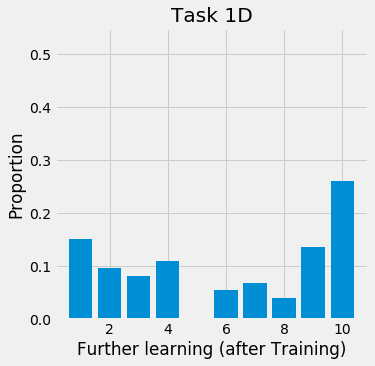

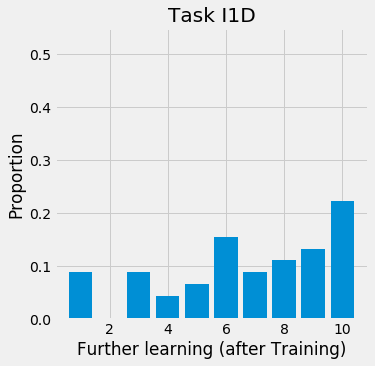

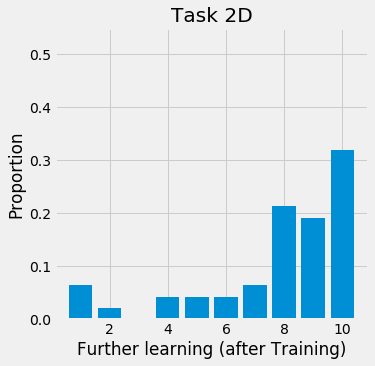

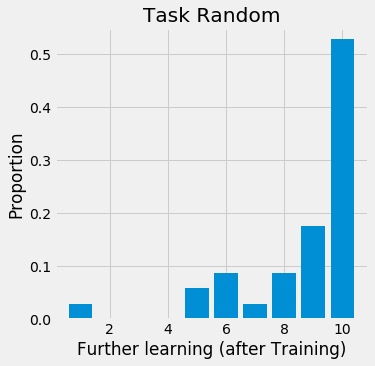

In [28]:
# Get first selections
selFTA = checkFirstOption(splitCsvFTE, usersFT)
selFTI = checkFirstOption(splitCsvFTI, usersFTI)
selFTU = checkFirstOption(splitCsvFTU, usersFTU)
gradesPerTask = []
#task
for t in range(4):
    # users
    subjects = np.where(selFTA == t)[0]
    grades = []
    for s in subjects.tolist():
        # Get subject observations
        temp = freeT[freeT[:,0] == s,:]
        grade = temp[temp[:,1] == t, 11]
        grades.append(float(grade))
    gradesPerTask.append(grades)


lab = ['1D','I1D','2D','Random']
for t in range(4):
    arrGrades = np.asarray(gradesPerTask[t])
    fig, ax = plt.subplots(figsize=(5, 5))
    
    a,b = np.histogram(arrGrades, bins=np.arange(1,12))
    # % with respect to everyone
    #plt.bar(np.arange(1,11), a/users2) # attention here with the number of subjects
    # % with respect to the selected task only
    plt.bar(np.arange(1,11), a/np.sum(a)) # attention here with the number of subjects
    ax.legend()
    ax.set_title(''.join(['Task ', lab[t]])) #str(t)]))
    ax.set_xlabel('Further learning (after Training)')
    ax.set_ylabel('Proportion')
    # wrt to everyone
    ax.set_ylim([0,0.55])

